<a href="https://colab.research.google.com/github/kecitclub/moyeMoye/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: make a function that passes in the prompt and returns the image generated from freepik

import requests
import json
import base64
from PIL import Image
import io
from IPython.display import display

def generate_freepik_image(prompt, neg=''):
    # payload = {
    #     "prompt": prompt,
    #     "styling": {
    #         "style": "photo",
    #     }
    # }



    url = "https://api.freepik.com/v1/ai/text-to-image"

    payload = {

        "prompt": prompt,
        "styling": {
            "framing": "first-person",
            "style": "photo"
        },
        "negative_prompt": neg,
        "guidance_scale": 1.5,
        "image": {"size": "square_1_1"}
    }

    headers = {
        "x-freepik-api-key": "FPSX6621b83d3b094c988ea254b3a1241f0d", # Replace with your actual API key
        "Content-Type": "application/json"
    }

    try:
        response = requests.request("POST", url, json=payload, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        response_json = response.json()

        image_data = response_json['data'][0]['base64']
        if image_data:
            image_bytes = base64.b64decode(image_data)
            image = Image.open(io.BytesIO(image_bytes))

            return image
        else:
            print("No image data found in the API response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error during API request: {e}")
        return None
    except (KeyError, IndexError) as e:
        print(f"Error parsing API response: {e}")
        print(response.text) # Print the response for debugging
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [2]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 8.3 MB/s eta 0:00:00


In [3]:
from groq import Groq
def chat(prompt):
  client = Groq(api_key="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")
  completion = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=[{
          "role":"user",
          "content":[
              {"type": "text", "text": prompt}
          ]
      }],
      temperature=2,
      max_tokens=1024,
  )
  return completion.choices[0].message.content


In [4]:
def create_image_prompt(product,vibe):
    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"


    description = f"Create and return a prompt to generate an image that will act as the background for an product which will be added later in post-production. the produced image embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
                  "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                  "that suggest the vibe without showing the product itself. The image must be composed with empty space in the lower half, "\
                  "Return only the answer that you would reply. Donot include any background references and product details. Just to the point answer."

    return description


In [31]:
while True:
  try:
    prompt = chat(create_image_prompt('laptop', 'tech'))
    break
  except Exception as e:
    continue

In [32]:
prompt

'Create an image with a foggy-cityscape-at-night backdrop, including neon lights, city skyscrapers, and sleek pavement, prominently featuring a palette of deep blues, shiny silvers, and touch of vibrant purples, with textures that evoke industrial and metallic sensation, take up the top half of the frame and leave empty space in the lower half with a faint grid or abstract pattern, creating a seamless interaction with modern technology and leaving room for elements to be inserted later.'

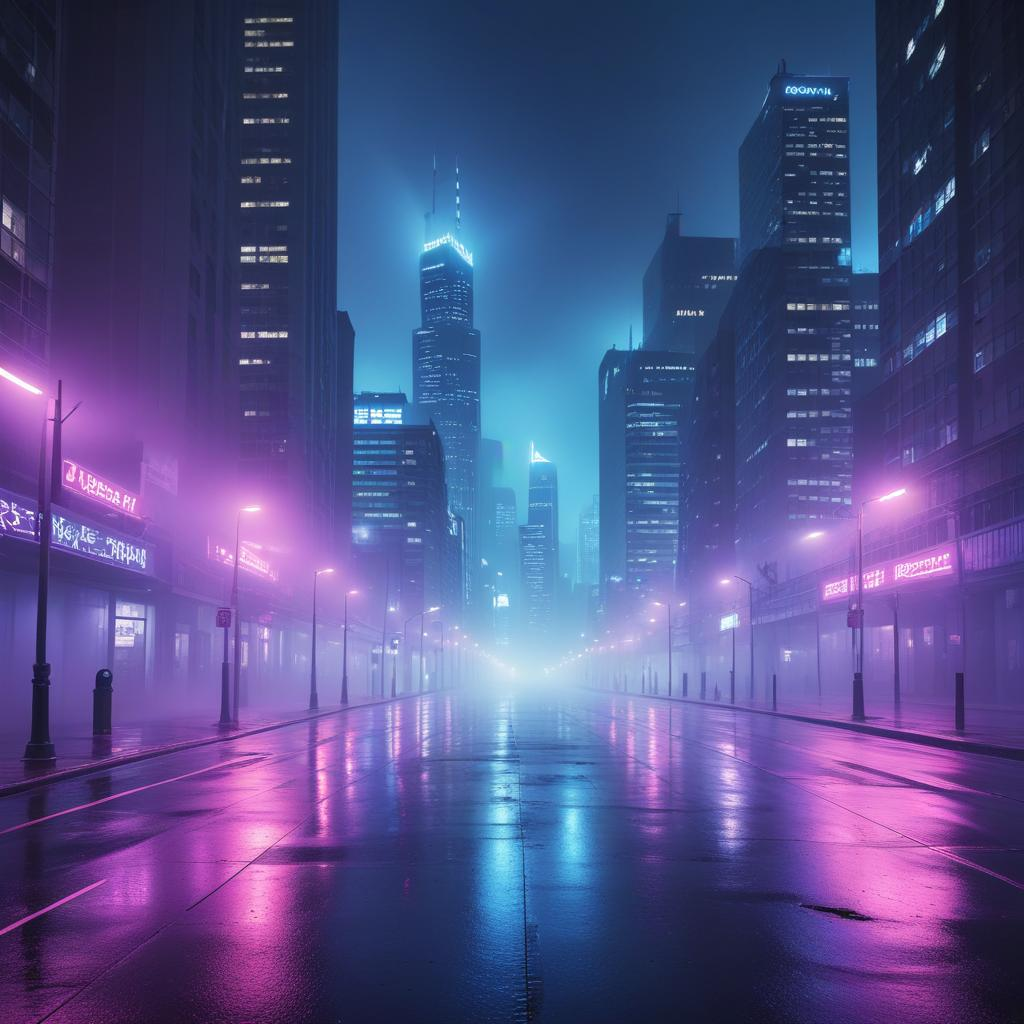

In [33]:
image = generate_freepik_image(prompt)
display(image)

In [8]:
import os

if image:
    # Generate a unique filename
    import uuid
    unique_filename = str(uuid.uuid4()) + ".png"  # Use UUID for uniqueness
    filepath = os.path.join("/content", unique_filename) # Save in /content directory

    # Save the image with the unique filename
    image.save(filepath)
    print(f"Image saved as: {unique_filename}")

    # Download the image
    from google.colab import files
    files.download(filepath)

Image saved as: d815286e-a64e-4995-879f-cb0378832633.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
def create_image_prompt_ocassion( product,vibe="festive"):

    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"

    occasions = {
        "Maghe Sankranti":"Create an image that combines festive elements of Maghe Sankranti. Include a colorful kite alongside a traditional wooden spinning top, set against a vibrant purple background. Adjacent to these, place a platter of round small sesame and puffed rice  laddus in a plate. Additionally, depict two traditional brass bowls, one filled with sesame seed balls and the other with cubes of jaggery, set on an ornate wooden tray. This composition should evoke the playful and joyous atmosphere of Maghe Sankranti while highlighting the traditional foods associated with the festival.",
        "Holi": "Create a vibrant and colorful image that captures the spirit of Holi, the festival of colors, without showing any human. The scene should feature a festive environment with colorful powders scattered in the air and on the ground, creating a vivid, multicolored landscape. Include elements like small, empty bowls of different colors that were used to hold the powders. The background should show trees and bushes lightly dusted with various hues of Holi powders, and the ground should be splattered artistically with a mix of bright colors. Add festive decorations such as colorful ribbons and paper streamers to enhance the celebratory atmosphere, all set under a bright, clear sky.",
        "Sahid Diwas": "Create a solemn and respectful image to commemorate Martyrs' Day in Nepal. The scene should feature a central monument or memorial, elegantly designed, representing the courage and sacrifice of the martyrs. Surround the monument with multiple lit oil lamps, casting a gentle glow that signifies remembrance and honor. Include a backdrop of the Nepalese national flag, subtly woven into the scene, emphasizing national pride. The setting should be serene, with a wreath of marigold flowers placed at the base of the monument as a tribute. The atmosphere should convey reverence and gratitude, capturing the solemnity of the day without any human figures, focusing solely on the symbolic elements of remembrance.",
        "Basant Panchami": "Create a vibrant and colorful image celebrating Basant Panchami, focusing on the symbolic elements associated with knowledge and the arts. Feature an elegantly arranged scene surrounded by neatly stacked books and writing instruments, all adorned with marigold flowers and soft petals. Include subtle elements like floating lotus flowers and peacock feathers in the background, enhancing the festive and cultural atmosphere. The setting should be bright and colorful, echoing the spirit of spring, with no human figures or faces of deities, maintaining a focus on the items symbolic of learning and creativity.",
        "Sonam Losar":"Create a festive and culturally rich image to celebrate Sonam Losar, the Tamang New Year. The scene should feature traditional Tamang elements such as colorful prayer flags, and a khapse (a traditional fried pastry), prominently displayed on a vibrant, decorative cloth. Include a depiction of the twelve animals of the Tibetan zodiac, with the animal representing the current year highlighted. The background should reflect the Himalayan mountains, symbolizing the region's geography. The setting should be festive with a warm and welcoming atmosphere, using a color palette of red, yellow, and green to represent prosperity, peace, and harmony. This image should be simple yet symbolic, suitable for a post that celebrates the cultural heritage and traditions of the Tamang community during Sonam Losar.",
    }

    if product in occasions:
          description = f"""
          Create and return a prompt to generate an image that embodies the vibe of '{(vibe if (product!='Sahid Diwas') else 'bravery')}' with an aesthetic that could be associated with the occasion : '{product}'.The description of occasion  are {occasions[product]}
                  The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery
                  that suggest the given occasion.the prompt must ensure that there should not be any human face in the photo . Also it should not include face of any gods as well.Faces of the god should not be shown in the statue as well.
                  Return only the answer that you would reply. Donot include any background references . Just to the point answer.

                  """
          return description




    description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with the occasion : '{product}'. "\
                "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                "that suggest the given occasion. "\
                " Return only the answer that you would reply. Donot include any background references . Just to the point answer."

    return description

In [10]:
while True:
  try:
    prompt = chat(create_image_prompt_ocassion( "marriage"))
    break
  except Exception as e:
    continue

In [11]:
prompt

'Generate an image of a luxurious wedding setup with asoft, golden lighting, floral decorations, and hues of ivory, gold, and pastel colors, featuring a beautiful, adorned wedding arch, surrounded by lush greenery, sparkling fairy lights, and delicate petitioner flowers, with a aisle walker and petals scattered, symbolizing the magic and intimacy of the special day.'

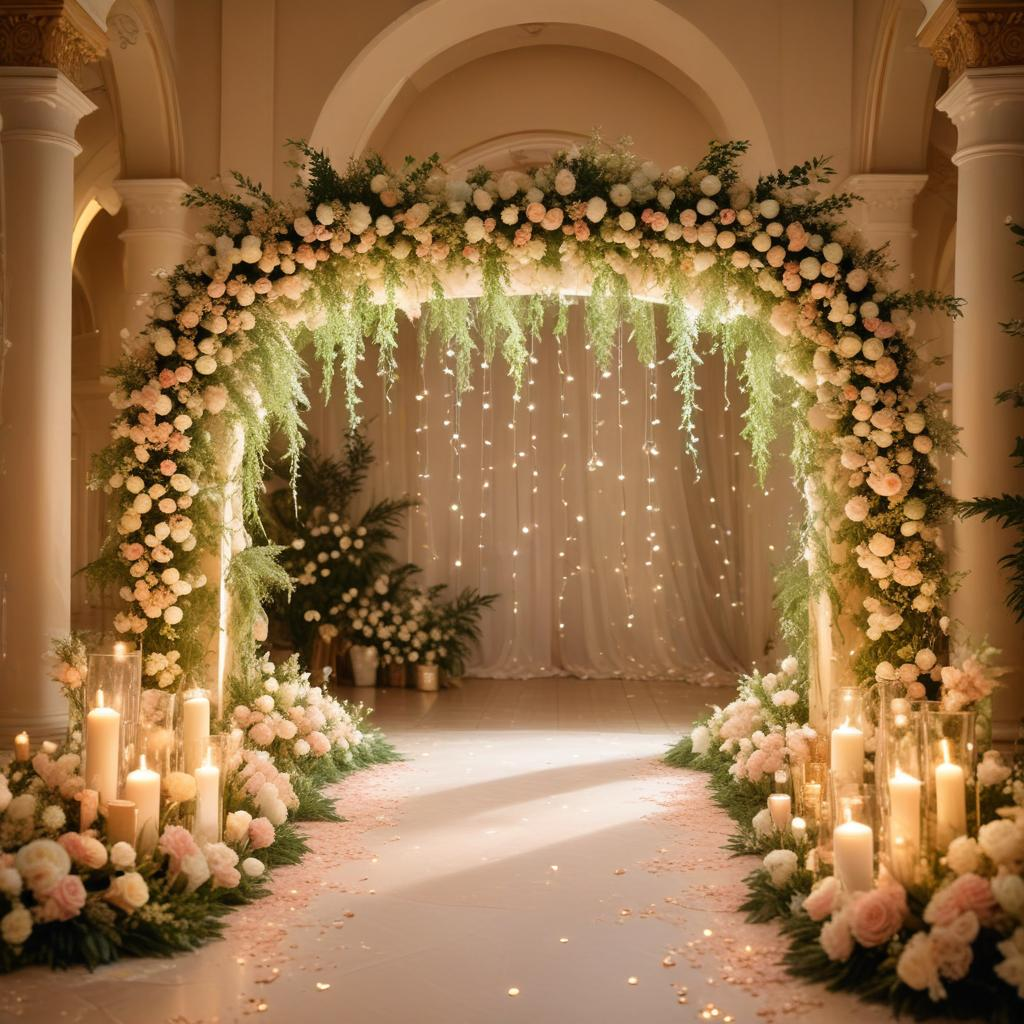

In [12]:
image = generate_freepik_image(prompt)
display(image)

Test:

In [13]:
!pip install groq

#Actual Funcs:


In [14]:
from groq import Groq
def chat(prompt, tokens = 1024):
  client = Groq(api_key="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")
  completion = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=[{
          "role":"user",
          "content":[
              {"type": "text", "text": prompt}
          ]
      }],
      temperature=2,
      max_tokens=tokens,
  )
  return completion.choices[0].message.content


In [15]:

# prompt: make a function that passes in the prompt and returns the image generated from freepik

import requests
import json
import base64
from PIL import Image
import io
from IPython.display import display

def generate_freepik_image(prompt):
    # payload = {
    #     "prompt": prompt,
    #     "styling": {
    #         "style": "photo",
    #     }
    # }




    url = "https://api.freepik.com/v1/ai/text-to-image"

    payload = {

        "prompt": prompt,
        "styling": {
            "framing": "first-person",
            "style": "photo"
        },
        "guidance_scale": 1.5,
        "image": {"size": "square_1_1"}
    }

    headers = {
        "x-freepik-api-key": "FPSX7a908e9ab5b64cfa820b29f2c18773a0", # Replace with your actual API key
        "Content-Type": "application/json"
    }

    try:
        response = requests.request("POST", url, json=payload, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        response_json = response.json()

        image_data = response_json['data'][0]['base64']
        if image_data:
            image_bytes = base64.b64decode(image_data)
            image = Image.open(io.BytesIO(image_bytes))

            return image
        else:
            print("No image data found in the API response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error during API request: {e}")
        return None
    except (KeyError, IndexError) as e:
        print(f"Error parsing API response: {e}")
        print(response.text) # Print the response for debugging
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [16]:
def create_image_prompt(product,vibe):
    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"


    description = f"Create and return a prompt to generate an image that will act as the background for an product which will be added later in post-production. the produced image embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
                  "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                  "that suggest the vibe without showing the product itself. The image must be composed with empty space in the lower half, there should not be any items in the lower half "\
                  "Return only the answer that you would reply. Donot include any background references and product details. Just to the point answer."

    return description


In [17]:
def create_image_prompt_ocassion( product,vibe="festive"):

    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"

    occasions = {
        "Maghe Sankranti":"Create an image that combines festive elements of Maghe Sankranti. Include a colorful kite alongside a traditional wooden spinning top, set against a vibrant purple background. Adjacent to these, place a platter of round small sesame and puffed rice  laddus in a plate. Additionally, depict two traditional brass bowls, one filled with sesame seed balls and the other with cubes of jaggery, set on an ornate wooden tray. This composition should evoke the playful and joyous atmosphere of Maghe Sankranti while highlighting the traditional foods associated with the festival.",
        "Holi": "Create a vibrant and colorful image that captures the spirit of Holi, the festival of colors, without showing any human. The scene should feature a festive environment with colorful powders scattered in the air and on the ground, creating a vivid, multicolored landscape. Include elements like small, empty bowls of different colors that were used to hold the powders. The background should show trees and bushes lightly dusted with various hues of Holi powders, and the ground should be splattered artistically with a mix of bright colors. Add festive decorations such as colorful ribbons and paper streamers to enhance the celebratory atmosphere, all set under a bright, clear sky.",
        "Sahid Diwas": "Create a solemn and respectful image to commemorate Martyrs' Day in Nepal. The scene should feature a central monument or memorial, elegantly designed, representing the courage and sacrifice of the martyrs. Surround the monument with multiple lit oil lamps, casting a gentle glow that signifies remembrance and honor. Include a backdrop of the Nepalese national flag, subtly woven into the scene, emphasizing national pride. The setting should be serene, with a wreath of marigold flowers placed at the base of the monument as a tribute. The atmosphere should convey reverence and gratitude, capturing the solemnity of the day without any human figures, focusing solely on the symbolic elements of remembrance.",
        "Basant Panchami": "Create a vibrant and colorful image celebrating Basant Panchami, focusing on the symbolic elements associated with knowledge and the arts. Feature an elegantly arranged scene surrounded by neatly stacked books and writing instruments, all adorned with marigold flowers and soft petals. Include subtle elements like floating lotus flowers and peacock feathers in the background, enhancing the festive and cultural atmosphere. The setting should be bright and colorful, echoing the spirit of spring, with no human figures or faces of deities, maintaining a focus on the items symbolic of learning and creativity.",
        "Sonam Losar":"Create a festive and culturally rich image to celebrate Sonam Losar, the Tamang New Year. The scene should feature traditional Tamang elements such as colorful prayer flags, and a khapse (a traditional fried pastry), prominently displayed on a vibrant, decorative cloth. Include a depiction of the twelve animals of the Tibetan zodiac, with the animal representing the current year highlighted. The background should reflect the Himalayan mountains, symbolizing the region's geography. The setting should be festive with a warm and welcoming atmosphere, using a color palette of red, yellow, and green to represent prosperity, peace, and harmony. This image should be simple yet symbolic, suitable for a post that celebrates the cultural heritage and traditions of the Tamang community during Sonam Losar.",
    }

    if product in occasions:
          description = f"""
          Create and return a prompt to generate an image that embodies the vibe of '{(vibe if (product!='Sahid Diwas') else 'bravery')}' with an aesthetic that could be associated with the occasion : '{product}'.The description of occasion  are {occasions[product]}
                  The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery
                  that suggest the given occasion.the prompt must ensure that there should not be any human face in the photo . Also it should not include face of any gods as well.Faces of the god should not be shown in the statue as well.
                  Return only the answer that you would reply. Donot include any background references . Just to the point answer.

                  """
          return description




    description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with the occasion : '{product}'. "\
                "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                "that suggest the given occasion. "\
                " Return only the answer that you would reply. Donot include any background references . Just to the point answer."

    return description

In [18]:
from PIL import Image

def overlay_table(image1_path, image2_path, output_path, offset_ratio=0.0):
    """
    Overlay two images, where image2 (with transparent background (table)) is placed on top of image1.
    Image2 is resized to match image1's dimensions and can be offset vertically.

    Parameters:
    image1_path (str): Path to the base image (determines final size)
    image2_path (str): Path to the overlay image (with transparent background)
    output_path (str): Path where the resulting image will be saved
    offset_ratio (float): Vertical offset as a ratio of image height (0.0 to 1.0)
                         e.g., 0.1 moves image2 down by 10% of the height
    """
    try:
        # Open both images
        try:
          base_img = Image.open(image1_path)
        except:
          base_image = image1_path
        overlay_img = Image.open(image2_path)

        # Convert images to RGBA if they aren't already
        base_img = base_img.convert('RGBA')
        overlay_img = overlay_img.convert('RGBA')

        # Get dimensions from base image
        target_size = base_img.size

        # Resize overlay image to match base image size
        overlay_img = overlay_img.resize(target_size, Image.Resampling.LANCZOS)

        # Calculate vertical offset in pixels
        vertical_offset = int(target_size[1] * offset_ratio)

        # Create a new blank image with the base image size
        result = Image.new('RGBA', target_size, (0, 0, 0, 0))

        # Paste the base image
        result.paste(base_img, (0, 0))

        # Create another transparent layer for the offset overlay
        overlay_layer = Image.new('RGBA', target_size, (0, 0, 0, 0))

        # Paste the overlay image with offset onto the transparent layer
        overlay_layer.paste(overlay_img, (0, vertical_offset), overlay_img)

        # Composite the overlay layer onto the result
        result = Image.alpha_composite(result, overlay_layer)

        # Save the result
        result.save(output_path, 'PNG')

        return result

    except Exception as e:
        print(f"Error processing images: {str(e)}")
        return False

In [19]:
def overlay_product(image1_path, image2_path, output_path, upward_offset_ratio=0.0, scale_factor=0.45):
    """
    Overlay image2 on top of image1, where:
    - Final image size matches image1
    - Image2 is proportionally scaled to a target height of scale_factor * image1_height
    - Image2 can be offset upward from the bottom

    Parameters:
    image1_path (str): Path to the base image
    image2_path (str): Path to the overlay image (with transparent background)
    output_path (str): Path where the resulting image will be saved
    upward_offset_ratio (float): Upward offset from bottom as ratio of image1 height (0.0 to 1.0)
    scale_factor (float): Target height of image2 as a ratio of image1 height (default 0.75)
    """
    try:
        # Open both images
        base_img = Image.open(image1_path)
        overlay_img = Image.open(image2_path)

        # Convert images to RGBA if they aren't already
        base_img = base_img.convert('RGBA')
        overlay_img = overlay_img.convert('RGBA')

        # Get base image dimensions
        base_width, base_height = base_img.size

        # Calculate target height for overlay image
        target_height = int(base_height * scale_factor)

        # Calculate scaling ratio based on overlay's current height
        scaling_ratio = target_height / overlay_img.size[1]

        # Calculate new width maintaining aspect ratio
        target_width = int(overlay_img.size[0] * scaling_ratio)

        # Resize overlay image
        overlay_img = overlay_img.resize((target_width, target_height), Image.Resampling.LANCZOS)

        # Create result image with base image dimensions
        result = Image.new('RGBA', (base_width, base_height), (0, 0, 0, 0))

        # Paste base image
        result.paste(base_img, (0, 0))

        # Calculate position for overlay image
        x_position = (base_width - target_width) // 2  # Center horizontally
        y_position = base_height - target_height  # Start from bottom

        # Apply upward offset
        upward_offset = int(base_height * upward_offset_ratio)
        y_position -= upward_offset

        # Create transparent layer for overlay
        overlay_layer = Image.new('RGBA', (base_width, base_height), (0, 0, 0, 0))
        overlay_layer.paste(overlay_img, (x_position, y_position), overlay_img)

        # Composite the images
        result = Image.alpha_composite(result, overlay_layer)

        # Save the result
        result.save(output_path, 'PNG')

        return result

    except Exception as e:
        print(f"Error processing images: {str(e)}")
        return False

In [20]:

def upscale(image,prompt=''):
  url = "https://api.freepik.com/v1/ai/image-upscaler"
  payload = {
      "image":  encode_image(image),
      "scale_factor": "2x",
      "optimized_for": "standard",
      "prompt": prompt,
      "hdr": 1,
      "fractality": 3,
      "engine": "magnific_sparkle",
      "creativity": 7,
      "resemblance": 3
  }

  headers = {
      "x-freepik-api-key": "FPSX7a908e9ab5b64cfa820b29f2c18773a0",
    "Content-Type": "application/json"
  }

  response = requests.request("POST", url, json=payload, headers=headers)

  response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
  response_json = response.json()

  task_id = response_json['data']['task_id']

  return task_id

In [21]:
def get_img(task_id):
  url = f"https://api.freepik.com/v1/ai/image-upscaler/{task_id}"

  headers = {"x-freepik-api-key": "FPSX7a908e9ab5b64cfa820b29f2c18773a0"}

  response = requests.request("GET", url, headers=headers)
  response_json = response.json()

  # if (response_json['data']['status'] == "COMPLETED" or response_json['data']['status'] =="CREATED"):
  #   print(response_json)
  return response_json['data']['generated']


In [22]:

def encode_image(image_path):
    """Encodes an image at the given path to a base64 string."""
    try:
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        return encoded_string
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"An error occurred during encoding: {e}")
        return None

In [23]:

import requests
import json
import os
from PIL import Image
import io
import base64
from IPython.display import display
from io import BytesIO

def load_image_from_url(url):
    """Loads an image from a URL and returns a PIL Image object."""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        image = Image.open(BytesIO(response.content))
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

In [24]:
!pip install pollinations

In [25]:
#backup if freepik is busy
import random

def get_pollination(prompt):
  width = 768
  height = 768
  seed = random.randint(1, 100) # Each seed generates a new image variation
  model = 'flux' # Using 'flux' as default if model is not provided  ["flux","flux-realism","flux-cablyai","flux-anime","flux-3d","any-dark","flux-pro","turbo"]

  image_url = f"https://pollinations.ai/p/{prompt}?width={width}&height={height}&seed={seed}&model={model}"

  try:
      response = requests.get(image_url, stream=True)
      response.raise_for_status()  # Raise an exception for bad status codes
      image = Image.open(BytesIO(response.content))
      return image
  except requests.exceptions.RequestException as e:
      print(f"Error downloading image: {e}")
      return None
  except Exception as e:
      print(f"Error processing image: {e}")
      return None

In [26]:
import time

def product_photo(product,vibe, table = True):
  while True:
    try:
      prompt = chat(create_image_prompt(product, vibe))
      break
    except Exception as e:
      continue

  try:
    image = generate_freepik_image(prompt)
  except:
    image = None
  if image is None or image == False:  # Check if image is None or False
    prompt = chat(create_image_prompt_ocassion(product, vibe), 512)
    image = get_pollination(prompt)
    if image is None:
      print("Both Freepik and Pollination failed to generate an image.")
      return None

  # display(image)
  if image:
      # Generate a unique filename
      import uuid
      unique_filename = str(uuid.uuid4()) + ".png"  # Use UUID for uniqueness
      filepath = os.path.join("/content", unique_filename) # Save in /content directory

      # Save the image with the unique filename
      image.save(filepath)
      print(f"Image saved as: {unique_filename}")

  prod_img = '/content/vodjpeg-removebg-preview.png'

  if (table):
    table_img =overlay_table(unique_filename, '/content/table1_trans.png', filepath,.1)
  im = overlay_product(filepath, prod_img, '/content/image44.png',.05, .55)


  #To upscale:
  try:
    task_id = upscale('/content/image44.png', '(realistic:2.6), (proper lighting:1.2)')

    print('ok')
    while True:
      if (get_img(task_id)):
        break
      time.sleep(5)


    fin_img = load_image_from_url(get_img(task_id)[0])
  except:
    fin_img = im
  return fin_img




In [27]:
import time

def festive_photo(product,vibe='', table = True):
  while True:
    try:
      prompt = chat(create_image_prompt_ocassion(product, vibe))
      break
    except Exception as e:
      continue

  try:
    image = generate_freepik_image(prompt)
  except:
    image = None
  if image is None or image == False:  # Check if image is None or False
    prompt = chat(create_image_prompt_ocassion(product, vibe), 512)
    image = get_pollination(prompt)
    if image is None:
      print("Both Freepik and Pollination failed to generate an image.")
      return None

  return image




In [28]:
img = festive_photo('Holi')

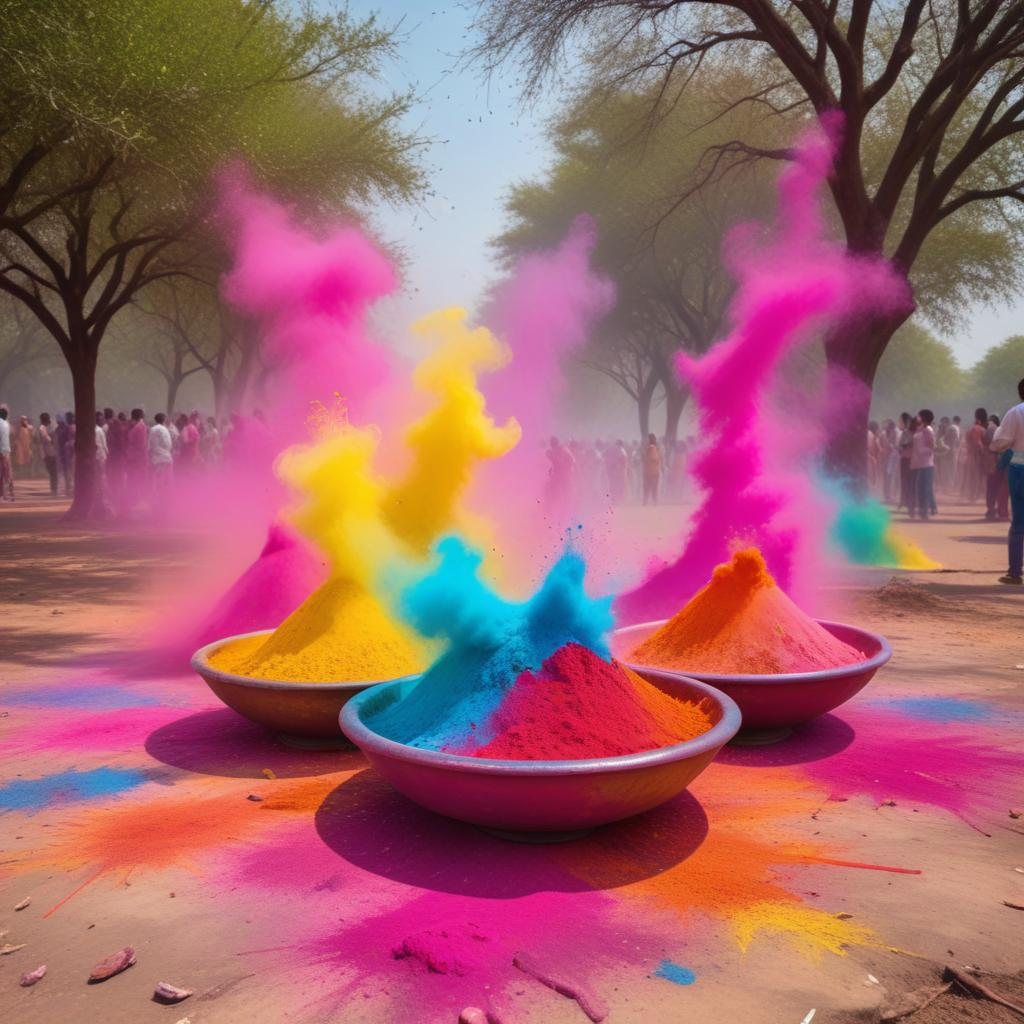

In [29]:
img

In [37]:
import cv2
from PIL import Image, ImageEnhance

def enhance_colors(image_path):
    """ Enhance colors and adjust brightness to give a more vibrant look """
    image = Image.open(image_path)
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(1.5)  # Increase color saturation by 50%
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1.1)  # Slightly increase the brightness
    return image

def add_blur_to_background(image_path, focal_point):
    """ Add selective blur to the background to create depth of field effect """
    image = cv2.imread(image_path)
    mask = np.zeros(image.shape[:2], np.uint8)
    mask[focal_point[1]:focal_point[1]+100, focal_point[0]:focal_point[0]+50] = 255
    blurred = cv2.GaussianBlur(image, (21, 21), 0)
    image = cv2.copyTo(blurred, mask, image)
    cv2.imwrite(image_path, image)



def adjust_contrast(image):
    """ Adjust the contrast of the image """
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.25)  # Increase contrast
    return image

def final_refinement(image_path):
    """ Apply a series of refinement steps to the image """
    try:
        # Load the image
        print("Loading image...")
        image = Image.open(image_path)

        # Enhance colors
        print("Enhancing colors...")
        enhancer = ImageEnhance.Color(image)
        image = enhancer.enhance(1.5)  # Increase color saturation by 50%

        # Adjust contrast
        print("Adjusting contrast...")
        image = adjust_contrast(image)

        # Save the refined image
        refined_path = image_path.split('.')[0] + '_refined.png'
        return refined_path
        #image.save(refined_path)
        #print(f"Refined image saved as: {refined_path}")

        return refined_path
    except Exception as e:
        print("An error occurred:", e)
        return None






# Example usage
import os

# Assuming your root path is /content and the file is in the Downloads folder under the user 'mishr'
base_path = "/content"
user_folder = "Users"
username = "mishr"
downloads = "Downloads"
filename = "YvROFRHuCNwAAAABJRU5ErkJggg.png"

# Correctly join the path based on the operating system
correct_path = os.path.join(base_path, user_folder, username, downloads, filename)

print("Correctly formatted path:", correct_path)

# Now you can use this path in your function
from google.colab import files
uploaded = files.upload()

# Assuming your file's key in the `uploaded` dict matches its filename
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Now you can use this file name in your function
final_image = final_refinement(file_name)
final_image_path = file_name.replace(".png", "_final.png")
#final_image.save(final_image_path)
print(f"Refined image saved as: {final_image_path}")




Correctly formatted path: /content/Users/mishr/Downloads/YvROFRHuCNwAAAABJRU5ErkJggg.png


Saving Enjoy_With_Us.png to Enjoy_With_Us (1).png
Uploaded file: Enjoy_With_Us (1).png
Loading image...
Enhancing colors...
Adjusting contrast...
Refined image saved as: Enjoy_With_Us (1)_refined.png
Refined image saved as: Enjoy_With_Us (1)_final.png


In [38]:
def product_features(description):


SyntaxError: incomplete input (<ipython-input-38-1e96f19cf105>, line 1)